In [1]:
import dinkum
from dinkum.vfg import Gene, Receptor, Ligand
from dinkum.vfn import Tissue

## Let's build a simple oscillator!

Here, X is always on, and activates Y - which in turns activates Z, which then *represses* Y, in turn de-activating Z.

initializing: dinkum v0.4.1
start=1 stop=20


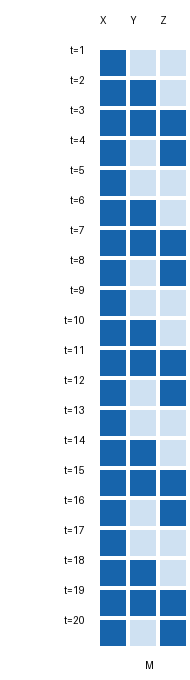

In [2]:
dinkum.reset()

x = Gene(name='X')
y = Gene(name='Y')
z = Gene(name='Z')
m = Tissue(name='M')

x.is_present(where=m, start=1)

# now define a regulatory relationship!
y.and_not(activator=x, repressor=z, delay=1)
z.activated_by(source=y)

# run for 20 ticks
dinkum.run_and_display(stop=20)

## Use the oscillations to send signals to neighboring tissues

initializing: dinkum v0.4.1
start=1 stop=15


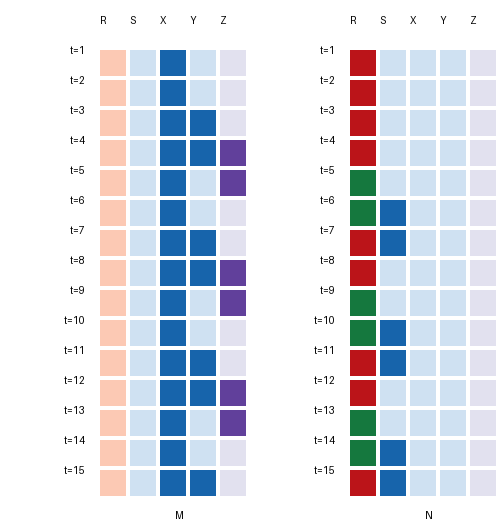

In [3]:
dinkum.reset()

x = Gene(name='X')
y = Gene(name='Y')
z = Ligand(name='Z')
r = Receptor(name='R', ligand=z)
s = Gene(name='S')

m = Tissue(name='M')
n = Tissue(name='N')

n.add_neighbor(neighbor=m)

x.is_present(where=m, start=1)

# now define a regulatory relationship that will be active in M:
y.and_not(activator=x, repressor=y, delay=2)
z.activated_by(source=y)

# and set up the receptor etc in N
r.is_present(where=n, start=1)

s.activated_by(source=r)

# run for 15 ticks (1 to 15)
dinkum.run_and_display(stop=15)